# Heart Disease Predictor 

We are going to pedict whether someone has heart disease or not, based on the data. 

- 1. Problem Definition
- 2. Data
- 3. Evaluate
- 4. Features
- 5. Modelling
- 6. Experimentations 

# Problem Definition 
> Based on the given data, we need to predict if a patient has heart disease or not. 

# Data 
> We have the data and have loaded it already.

# Evaluation 
>  We need to make sure that our model accuracy must be above 95%.

# Features 

*age* : age in years

*sex* : sex (1 = male; 0 = female)

*cp* : chest pain type
- Value 0: typical angina
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: asymptomatic

*trestbps* : resting blood pressure (in mm Hg on admission to the hospital)

*chol* : serum cholestoral in mg/dl

*fbs* : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

*restecg* : resting electrocardiographic results
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

*thalach* : maximum heart rate achieved

*exang* : exercise induced angina (1 = yes; 0 = no)

*oldpeak* : ST depression induced by exercise relative to rest

*slope* : the slope of the peak exercise ST segment
- Value 0: upsloping
- Value 1: flat
- Value 2: downsloping

*ca* : number of major vessels (0-3) colored by flourosopy

*thal* : 
- 0 = normal
- 1 = fixed defect
- 2 = reversable defect and the label

*condition* : 0 = no disease, 1 = disease

# Tools Preparation

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
# Importiing Models Of sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Importing Evaluation Libraries 
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score,roc_curve

# Exploratory Data Analysis 

1. What problem you are going to solve?
2. What kind of data do you have?
3. Does this data contain missing values?
4. Are there any outliers, sporious vectors?
5. Is there a need to add or remove some of the features?

In [2]:
df = pd.read_csv('Heart disease data.csv')
df = pd.DataFrame(df)
df.shape

(297, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [5]:
df['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

<Axes: xlabel='condition'>

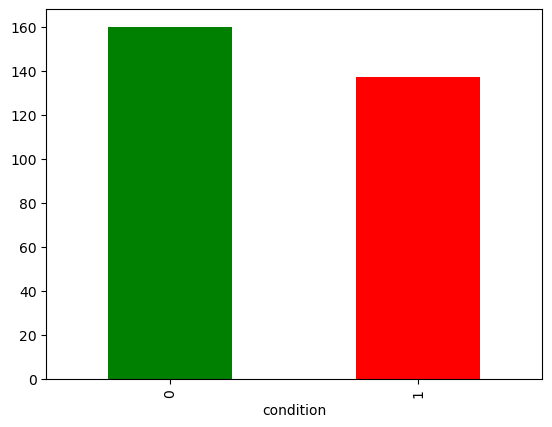

In [6]:
df['condition'].value_counts().plot(kind = 'bar', color = ['green','red'])

In [7]:
df.isna().sum() #any missing values?

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [9]:
df['sex'].value_counts()

sex
1    201
0     96
Name: count, dtype: int64

In [10]:
len(df)

297

In [11]:
201/297 #almost 70% males and 30 females

0.6767676767676768

In [12]:
pd.crosstab(df.condition,df.sex) # Total 46% people have heart disease, 55% males have heart disease and 26% females have heart disease

sex,0,1
condition,,
0,71,89
1,25,112


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

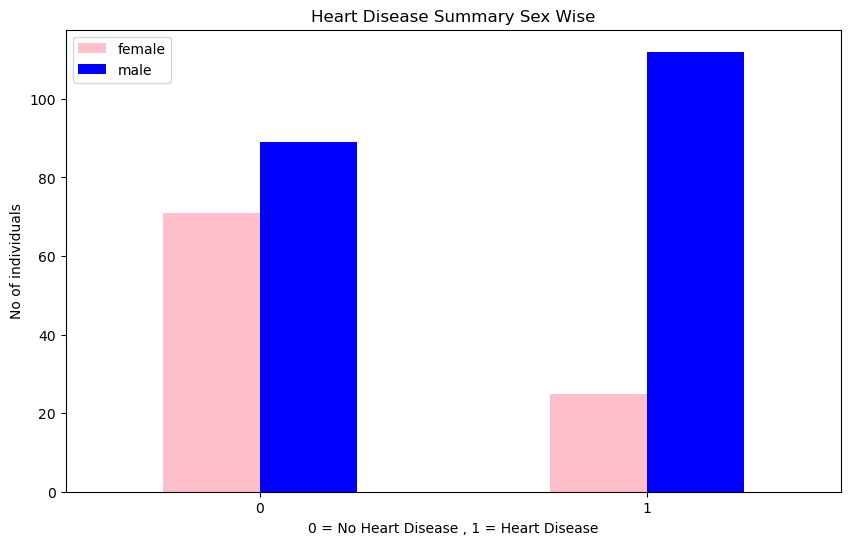

In [13]:
pd.crosstab(df.condition,df.sex).plot(kind = 'bar', figsize = (10,6) , color = ['pink','blue'])
plt.title('Heart Disease Summary Sex Wise')
plt.xlabel( '0 = No Heart Disease , 1 = Heart Disease')
plt.ylabel('No of individuals')
plt.legend(['female','male'])
plt.xticks(rotation = 0)

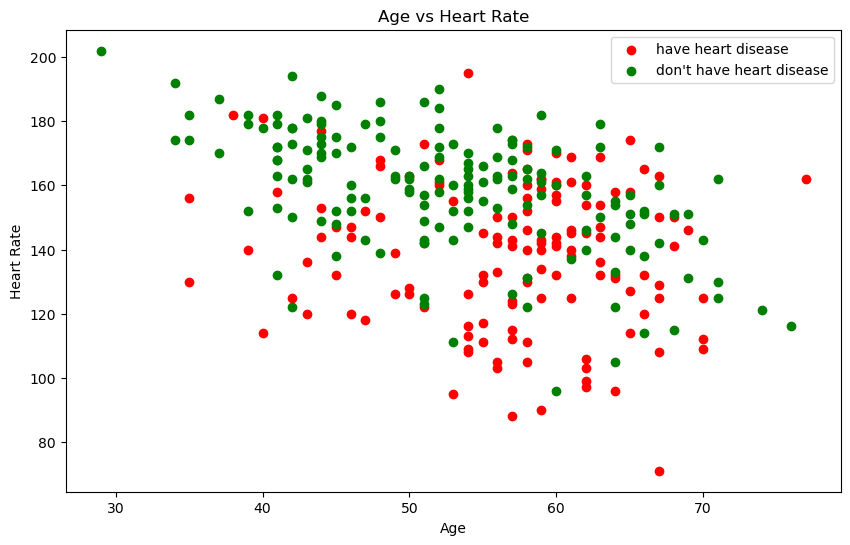

In [14]:
#finding patterns in data using scatter plot
plt.figure(figsize = (10,6))
plt.scatter(df.age[df.condition==1],df.thalach[df.condition==1],c='red')
plt.title('Age vs Heart Rate')
plt.xlabel( 'Age')
plt.ylabel('Heart Rate')
plt.scatter(df.age[df.condition==0],df.thalach[df.condition==0],c='green')
plt.legend(['have heart disease ', "don't have heart disease"])
# Observation : In most of the healthy individuals,a higher heart rate (140 or above) is maintained even with increasing age,whereas 
# individuals with heart  disease are mostly older and have a heart rate that falls between 80 and 180, indicating a broader and more 
# variable heart rate range in this group.

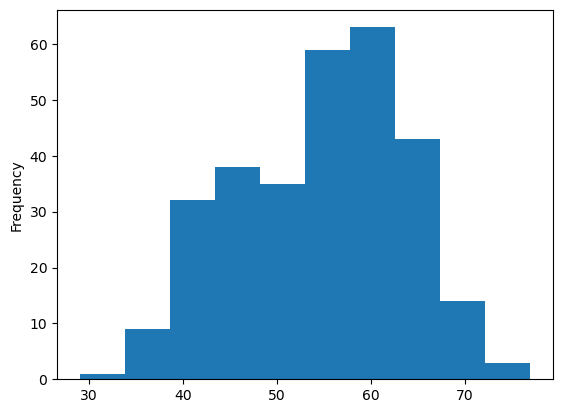

In [15]:
#creating histogram to see age distribution
df.age.plot.hist();
# curve is skewed towards higher age values 

In [16]:
df.cp.value_counts()

cp
3    142
2     83
1     49
0     23
Name: count, dtype: int64

* cp : chest pain type:
*  Value 0: typical angina : chest pain due to decrease in blood pressure (related to heart disease)
*  Value 1: atypical angina : not related to heaert problem
*  Value 2: non-anginal pain : not related to heart problem
*  Value 3: asymptomatic : silent heart attacks (not showing any symptoms) or “silent” coronary disease connotes complete absence of symptoms. 

In [17]:
# chest pain vs conditio
pd.crosstab(df.cp,df.condition)

condition,0,1
cp,,
0,16,7
1,40,9
2,65,18
3,39,103


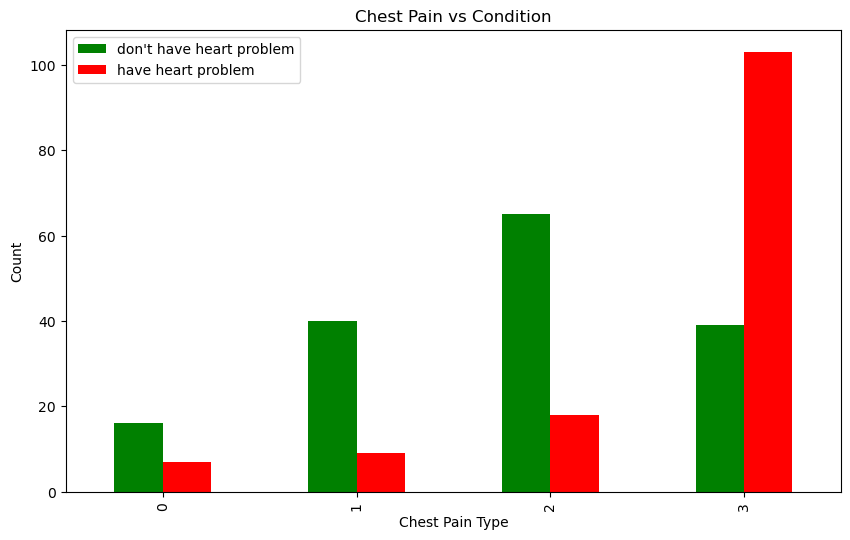

In [18]:
pd.crosstab(df.cp,df.condition).plot(kind= 'bar',figsize=(10,6),color = ['green','red'])
plt.title('Chest Pain vs Condition')
plt.xlabel( 'Chest Pain Type')
plt.ylabel('Count')
plt.legend(["don't have heart problem", 'have heart problem']);

In [19]:
#Correlation Metrics

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [21]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.120795,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.370556,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.266275,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.130612,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.023441,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.051038,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.013612,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.258386,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.323268,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.336809,0.424052


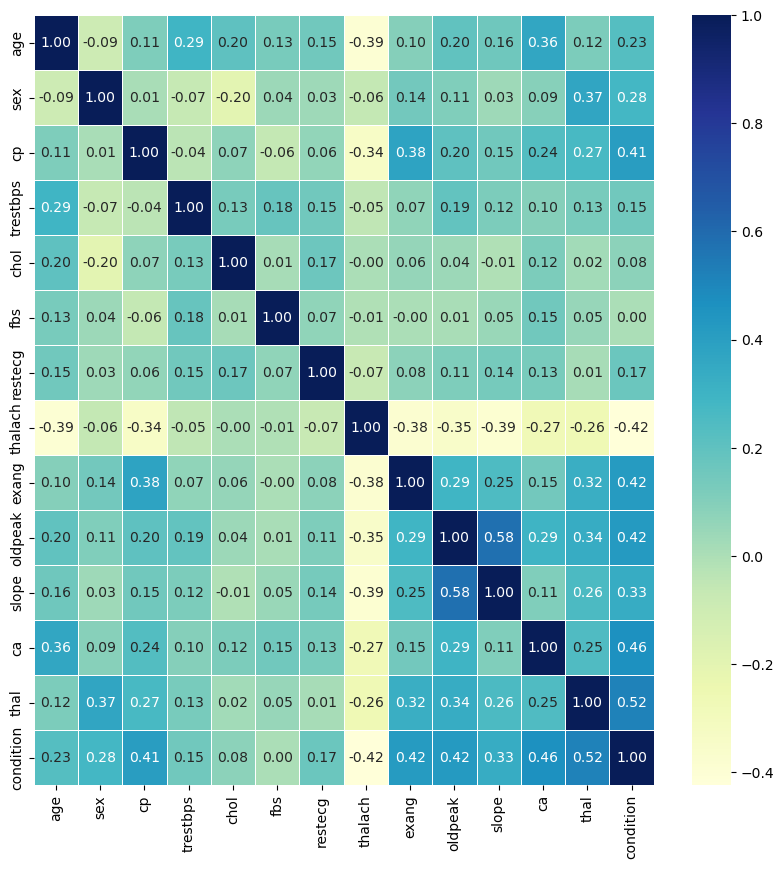

In [22]:
corr_map = df.corr()
fig,ax = plt.subplots(figsize = (10,10))
ax = sns.heatmap(corr_map,
                annot = True,
                linewidths = 0.5,
                fmt = '0.2f',
                cmap = 'YlGnBu')

# Modelling 

          K Nearest Neigbor  Random Forest  Logistic Regression
Accuracy           0.733333           0.85             0.883333 




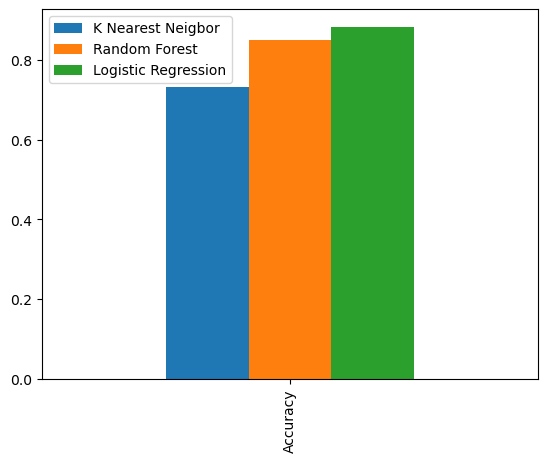

In [23]:
#splitting data 
x = df.drop('condition',axis =1 )
y = df['condition']
np.random.seed(7)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

# Ensure y_train and y_test are Series
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)
#choosing model
#putting multiple models in a dictionary 
models = {'K Nearest Neigbor':KNeighborsClassifier(),'Random Forest':RandomForestClassifier(),
          'Logistic Regression':LogisticRegression(solver='liblinear')}
def fit_and_score(models,x_train,x_test,y_train,y_test):
        np.random.seed(7)
        # dictionary to score the models
        model_score = {}
        #looping through
        for name,model in models.items():
            #fitting model 
            model.fit(x_train,y_train)
            #evaluating
            model_score[name] = model.score(x_test,y_test)
        return model_score
model_scores = fit_and_score(models = models,
                             x_train = x_train,
                             x_test = x_test,
                             y_train = y_train,
                             y_test = y_test)
model_compare = pd.DataFrame(model_scores,index = ['Accuracy'])
print(model_compare,'\n\n')
model_compare.plot.bar();

# Improving and tuning mmodel
  Universal Methods used for all classification problems

  * Hyperparameters Tuning
  * Features Improving
  

In [24]:
#Hyperparameters Tuning
#Features Improving
train_score = []
test_score = []
KNN = KNeighborsClassifier()
nneighbors = range(1,30)
for i in nneighbors :
    KNN.set_params(n_neighbors = i)
    KNN.fit(x_train,y_train)
    train_score.append(KNN.score(x_train,y_train))
    test_score.append(KNN.score(x_test,y_test))
print(train_score,'\n\n')
print(test_score)

[1.0, 0.7468354430379747, 0.759493670886076, 0.7552742616033755, 0.7848101265822784, 0.7468354430379747, 0.7468354430379747, 0.7172995780590717, 0.7130801687763713, 0.7088607594936709, 0.7046413502109705, 0.6835443037974683, 0.6919831223628692, 0.6708860759493671, 0.6582278481012658, 0.6455696202531646, 0.6497890295358649, 0.6624472573839663, 0.6666666666666666, 0.6624472573839663, 0.6497890295358649, 0.6540084388185654, 0.6624472573839663, 0.6666666666666666, 0.6835443037974683, 0.6666666666666666, 0.6666666666666666, 0.6497890295358649, 0.6582278481012658] 


[0.5833333333333334, 0.6333333333333333, 0.6833333333333333, 0.7, 0.7333333333333333, 0.75, 0.7666666666666667, 0.7333333333333333, 0.7, 0.7166666666666667, 0.75, 0.7, 0.7166666666666667, 0.7, 0.7, 0.75, 0.75, 0.7833333333333333, 0.8166666666666667, 0.8166666666666667, 0.8166666666666667, 0.8333333333333334, 0.8166666666666667, 0.8, 0.8166666666666667, 0.8, 0.8, 0.8, 0.7666666666666667]


Maximum KNN score  83.33333333333334 %


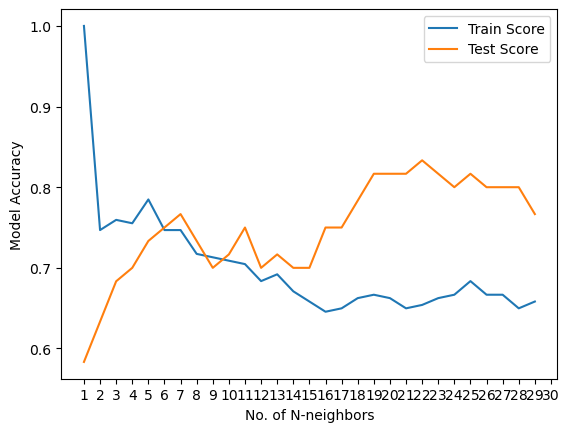

In [25]:
#plotting acuracy scores
plt.plot(nneighbors,train_score, label = 'Train Score')
plt.plot(nneighbors,test_score, label = 'Test Score')
plt.xticks(np.arange(1,31,1))
plt.xlabel('No. of N-neighbors')
plt.ylabel('Model Accuracy')
plt.legend()
print('Maximum KNN score ', max(test_score)*100 , '%')
#ACCURACY GIVEN BY KNN IS NOT SATISFYING THE EVALUATION CRITERIA , THEREFORE WE ARE DROPPING THIS MODEL

In [26]:
#logisticRegression and RandomForestClassifier Hyperparameter tunning using Randomized Search CV
LR_hp = {
    'C': np.logspace(-5,9,20),
    'solver': ['liblinear']}

RFC_hp = {'n_estimators': np.arange(10,1600,100),
          'max_depth': [None , 3,5,6,8], 
          'min_samples_split':np.arange(2,20,2),
          'min_samples_leaf':np.arange(1,20,2)}

In [27]:
np.random.seed(7)
lr = RandomizedSearchCV(LogisticRegression(),
                        param_distributions = LR_hp,
                       cv = 5 , 
                       n_iter = 20 , 
                       verbose = True)
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8833333333333333

In [28]:
lr.best_params_

{'solver': 'liblinear', 'C': 0.04832930238571752}

In [29]:
np.random.seed(7)
RFC = RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions = RFC_hp,
                       cv = 5 , 
                       n_iter = 20 , 
                       verbose = True)
RFC.fit(x_train,y_train)
RFC.score(x_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8833333333333333

In [30]:
RFC.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 19,
 'max_depth': 6}

In [31]:
#logisticRegression and RandomForestClassifier Hyperparameter tunning using Randomized Search CV
np.random.seed(7)
lr_gs = GridSearchCV(LogisticRegression(),
                        param_grid = LR_hp,
                       cv = 5 , 
                       verbose = True)
lr_gs.fit(x_train,y_train)
lr_gs.score(x_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8833333333333333

In [32]:
#no change in accuracy
y_predict_lr = lr_gs.predict(x_test)
print(accuracy_score(y_test,y_predict_lr))
print(lr_gs.best_params_)

0.8833333333333333
{'C': 0.04832930238571752, 'solver': 'liblinear'}


In [33]:
RFC_hp = {'n_estimators': [700,710,800],
          'max_depth': [6,20], 
          'min_samples_split':[4,16],
          'min_samples_leaf':[2,19]}
np.random.seed(7)
RFC_gs = GridSearchCV(RandomForestClassifier(),
                        param_grid = RFC_hp,
                       cv = 5 , 
                       verbose = True)
RFC_gs.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [6, 20], 'min_samples_leaf': [2, 19],
                         'min_samples_split': [4, 16],
                         'n_estimators': [700, 710, 800]},
             verbose=True)

In [34]:
RFC_gs.score(x_test,y_test)*100 # Accuracy increased

90.0

In [35]:
RFC_gs.best_params_

{'max_depth': 20,
 'min_samples_leaf': 19,
 'min_samples_split': 4,
 'n_estimators': 710}

# Evaluation    
 Advance level evaluation:
   * Confusion Matrix
   * cross validation
   * precision
   * recall
   * f1
   * classification report
   * roc curv

In [36]:
#AREA UNDER THE CURVE 

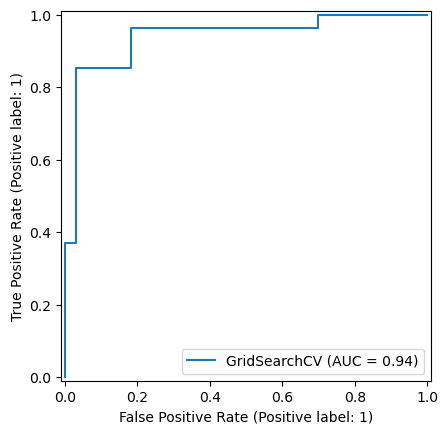

In [37]:
#LgisticRegression
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(lr_gs,x_test,y_test)

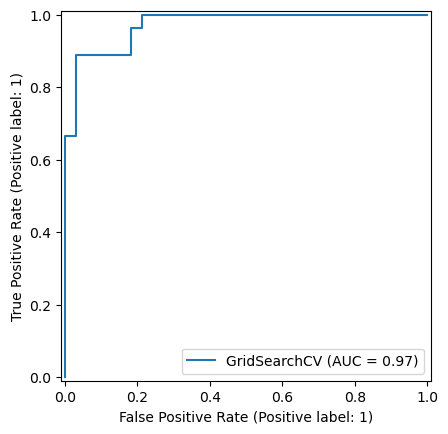

In [38]:
#RandomForestClassifier
RocCurveDisplay.from_estimator(RFC_gs,x_test,y_test)

In [39]:
#CONFUSION MATRIX

[[30  3]
 [ 4 23]] 




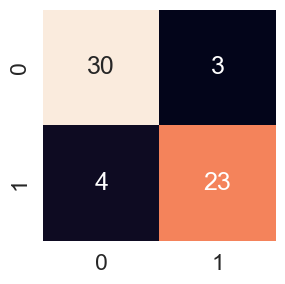

In [40]:
#LogisticRegression
y_predict_lr = lr_gs.predict(x_test)
print(confusion_matrix(y_test,y_predict_lr),'\n\n')
sns.set(font_scale = 1.5)
def plot_conf_mat(y_test,y_predict):
    fig , ax = plt.subplots(figsize =(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_predict),annot = True, cbar = False)
plot_conf_mat(y_test,y_predict_lr)
    

[[30  3]
 [ 3 24]] 




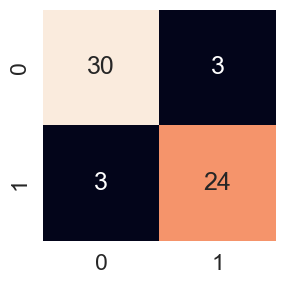

In [41]:
#RandomForestClassifier
y_predict_RFC = RFC_gs.predict(x_test)
print(confusion_matrix(y_test,y_predict_RFC),'\n\n')
sns.set(font_scale = 1.5)
def plot_conf_mat(y_test,y_predict):
    fig , ax = plt.subplots(figsize =(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_predict),annot = True, cbar = False)
plot_conf_mat(y_test,y_predict_RFC)

In [42]:
#CLASSIFICATION REPORT 

In [43]:
#LogisticRegression
report_lr = classification_report(y_test,y_predict_lr)
print(report_lr)

              precision    recall  f1-score   support

           0       0.88      0.91      0.90        33
           1       0.88      0.85      0.87        27

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



In [44]:
#LogisticRegression
report_RFC = classification_report(y_test,y_predict_RFC)
print(report_RFC)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        33
           1       0.89      0.89      0.89        27

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



In [48]:
#RandomForestRegressor is performing well that's why dropping LogisticRegression

In [45]:
cross_val_score(RFC_gs,x,y,cv=5,scoring = 'accuracy')

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits


array([0.66666667, 0.88333333, 0.84745763, 0.91525424, 0.6779661 ])

# Features Improvement 

In [56]:
RFC = RandomForestClassifier(max_depth = 20,
 min_samples_leaf = 19,
 min_samples_split = 4,
 n_estimators = 710) #using best params given by GSCV
RFC.fit(x_train,y_train)
feature_importance = RFC.feature_importances_
feature_importance 

array([0.05026147, 0.02671627, 0.23125883, 0.01357888, 0.01889834,
       0.        , 0.01118269, 0.10439473, 0.05702105, 0.07959072,
       0.05000721, 0.15900022, 0.19808958])

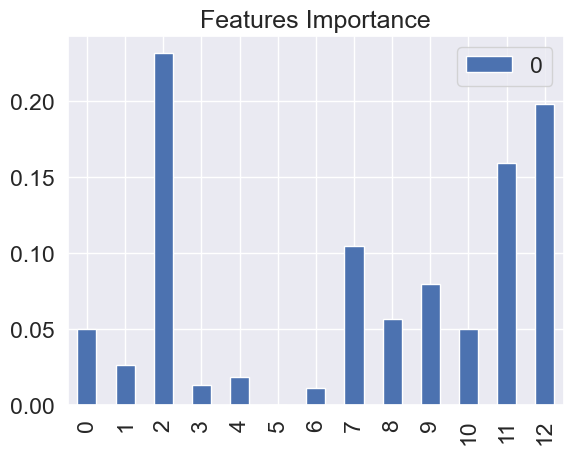

In [67]:
features = pd.DataFrame(feature_importance)
features.plot.bar(title = 'Features Importance');

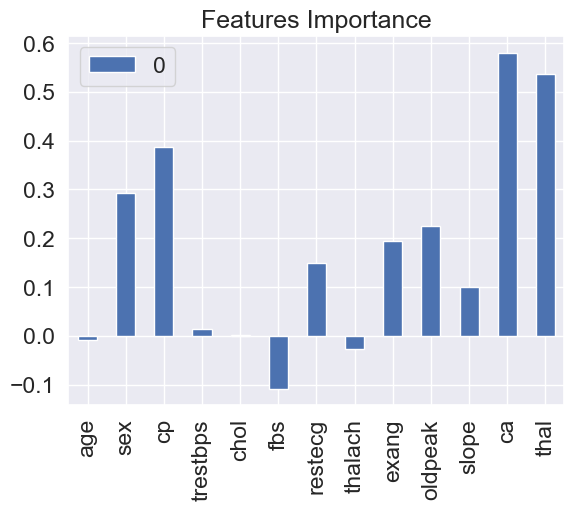

In [72]:
lr = LogisticRegression(C =  0.04832930238571752, solver = 'liblinear')
lr.fit(x_train,y_train)
features = dict(zip(df.columns,list(lr.coef_[0])))
features = pd.DataFrame(features,index = [0])
features.T.plot.bar(title = 'Features Importance');